In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("algerian forest fire.csv")

In [3]:
df['Classes'] = df['Classes'].str.strip().map({'fire':1,'not fire':0})

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
# independent and dependent

In [7]:
x = df.drop('FWI',axis=1)
y = df.FWI

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [9]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.584188,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,0.507122,-0.081489
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,0.736142,0.266298
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,0.584545,0.087996
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000,0.719407,0.198474


<Axes: >

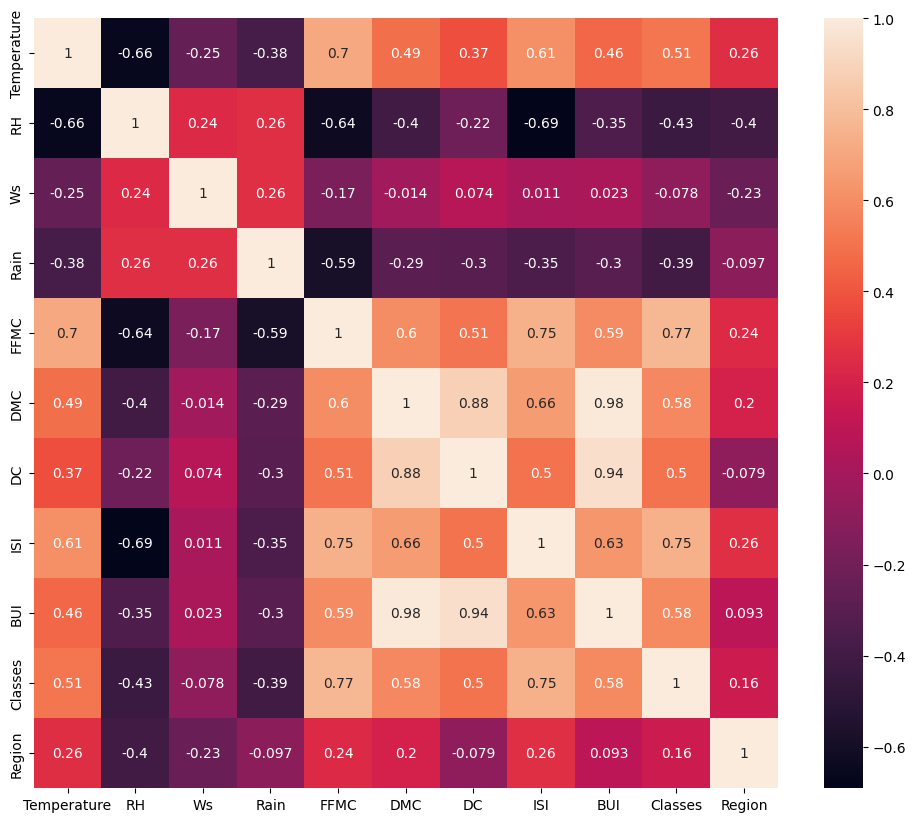

In [10]:
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr, annot=True)

In [11]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(x_train, 0.85)

In [13]:
## drop features where corr is more than 0.85
x_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)
x_train.shape,x_test.shape

((183, 9), (61, 9))

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [15]:
x_train_scaled

array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.77409606,
        -1.1098231 , -1.00547949],
       [ 1.06405791, -0.44884168,  0.15167049, ...,  0.84971776,
         0.9010445 ,  0.99455037],
       [-0.27516216,  0.63907922, -0.60875963, ..., -0.21666743,
         0.9010445 ,  0.99455037],
       ...,
       [-1.88222624,  0.91105944,  0.53188555, ..., -1.08916441,
        -1.1098231 , -1.00547949],
       [ 0.26052587, -0.38084663,  0.15167049, ...,  0.48617735,
         0.9010445 ,  0.99455037],
       [-0.54300617,  0.9790545 ,  2.05274578, ..., -0.87104017,
        -1.1098231 , -1.00547949]])

In [16]:
# box plot

Text(0.5, 1.0, 'x_train after scaling')

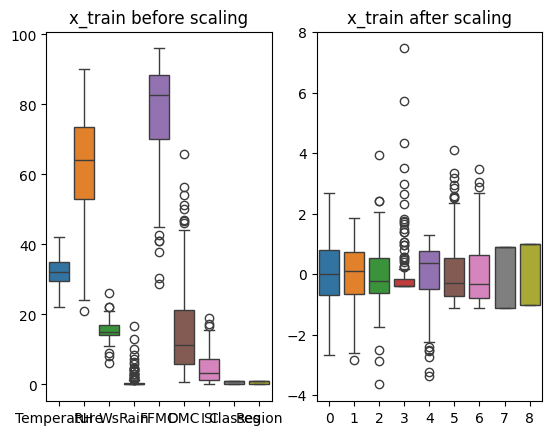

In [17]:
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title("x_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title("x_train after scaling")

In [18]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
LR = LinearRegression()
LR.fit(x_train_scaled, y_train)
y_pred = LR.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

In [19]:
print(mae, score)

0.5516452785962692 0.9903254415482379


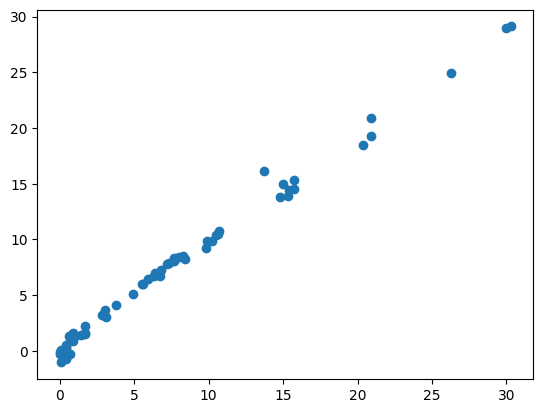

In [20]:
plt.scatter(y_test,y_pred)

In [21]:
# lassa regression

1.1862508609509752 0.9527186921986258


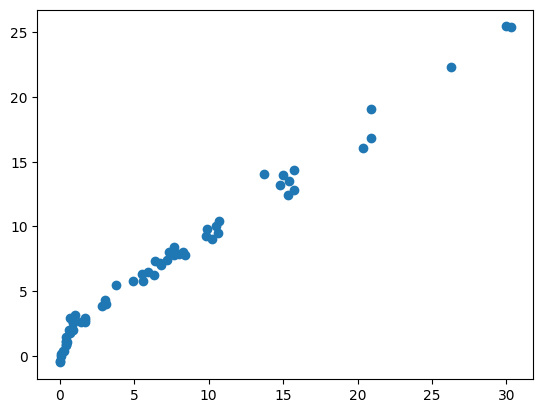

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
Ls = Lasso()
Ls.fit(x_train_scaled, y_train)
y_pred = Ls.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae, score)
plt.scatter(y_test,y_pred)

In [23]:
#cross validation lasso
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled, y_train)


LassoCV(cv=5)

In [24]:
lassocv.alpha_

0.023540632541152396

0.590225550670557 0.989599580707254


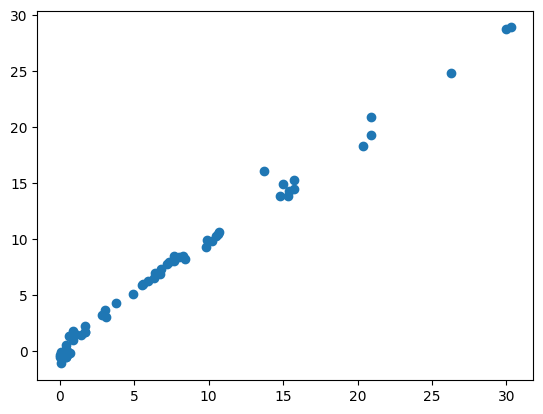

In [25]:
y_pred = lassocv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae, score)
plt.scatter(y_test,y_pred)

0.5779554428412202 0.9896510143175394


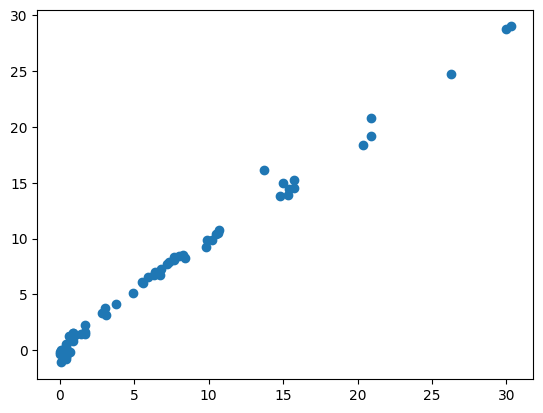

In [26]:
#ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
R = Ridge()
R.fit(x_train_scaled, y_train)
y_pred = R.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae, score)
plt.scatter(y_test,y_pred)

0.5779554428412202 0.9896510143175394


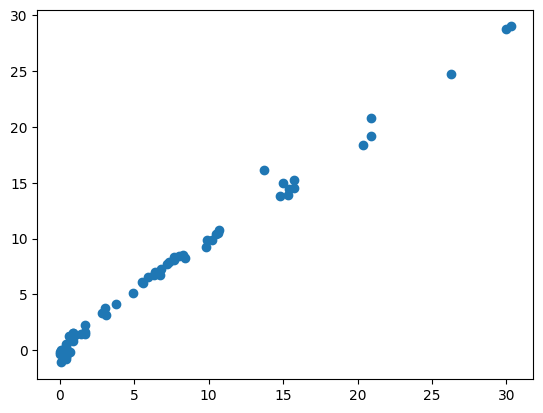

In [27]:
# rdgecv 
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
Rv = RidgeCV(cv=5)
Rv.fit(x_train_scaled, y_train)
y_pred = Rv.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae, score)
plt.scatter(y_test,y_pred)

In [28]:
Rv.alpha_

1.0

1.9100570629061815 0.8776588851433474


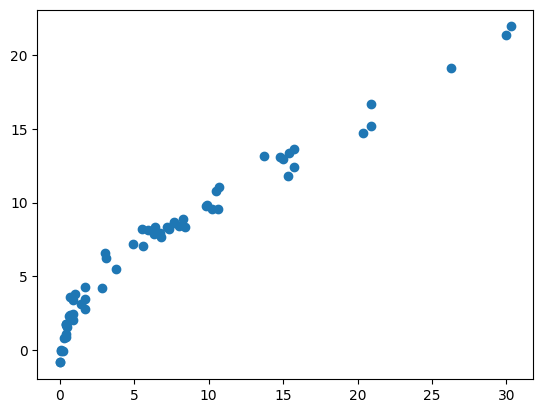

In [29]:
# elastic net
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
en = ElasticNet()
en.fit(x_train_scaled, y_train)
y_pred = en.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae, score)
plt.scatter(y_test,y_pred)

0.6148342313483075 0.9888306667580836


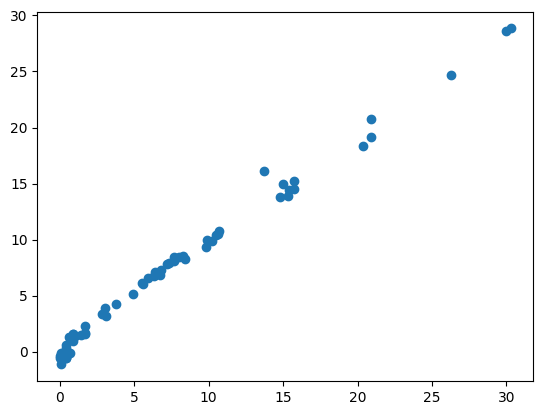

In [30]:
# elasticcv 
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
ENV = ElasticNetCV(cv=5)
ENV.fit(x_train_scaled, y_train)
y_pred = ENV.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(mae, score)
plt.scatter(y_test,y_pred)

In [31]:
## pickle the model
scaler

StandardScaler()

In [33]:
ENV

ElasticNetCV(cv=5)

In [34]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))
pickle.dump(ENV, open('ElasticNetCV.pkl','wb'))